# Fill two-cell hole in iceshelf on east side of peninsula

Identified by Nico: (i, j ) =  ( 904:905, 281)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
domain_current = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc')
bathy_current  = xr.open_dataset(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20250715.nc')
ds_current     = xr.open_dataset(f'{base_dir}output/CESM2_3hwind_1920_t0_0955/files0/eANT025.L121_1m_19500101_19501231_icemod_compressed.nc')

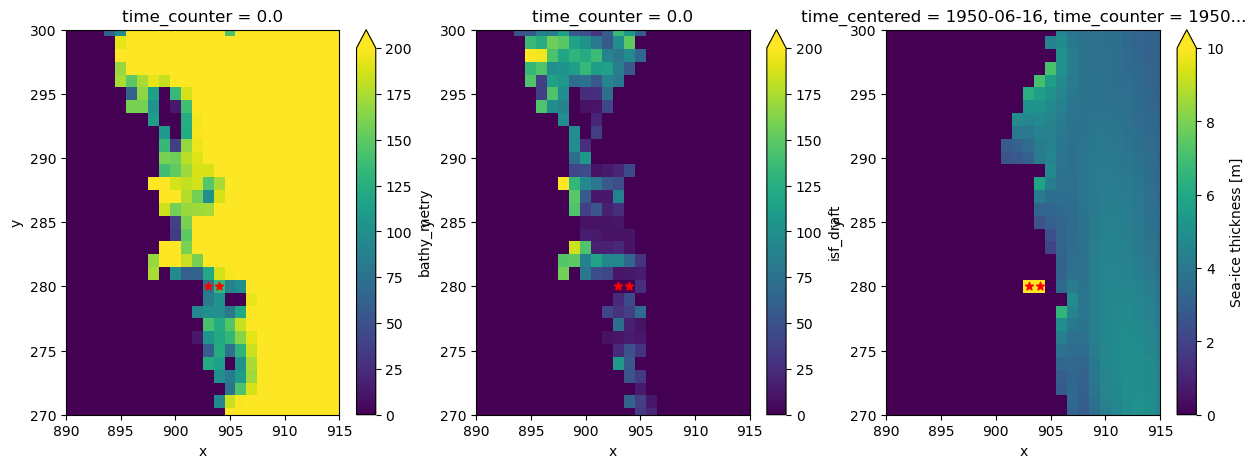

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

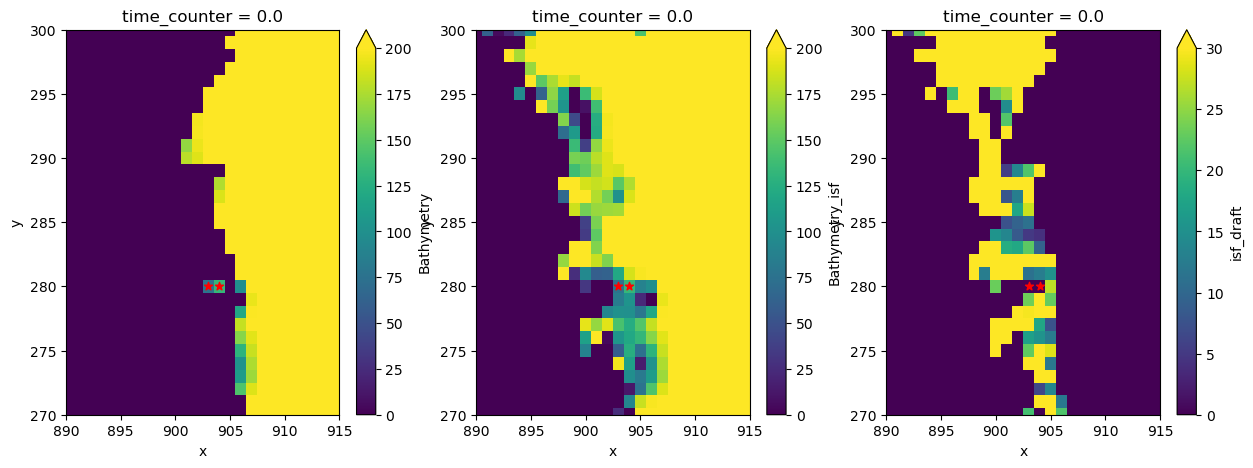

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [29]:
print(bathy_current.Bathymetry.isel(x=904, y=280).values)
print(bathy_current.Bathymetry_isf.isel(x=904, y=280).values)
print(bathy_current.isf_draft.isel(x=904, y=280).values)

133.51256560319652
133.51256560319652
0.0


Fill two problematic cells (since it's connected to areas that are land, probably easiest to just make into land)

In [41]:
bathy_new = bathy_current.copy()

make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[280, 903:905] = 1
bathy_new['Bathymetry'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry'])
bathy_new['Bathymetry_isf'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry_isf'])

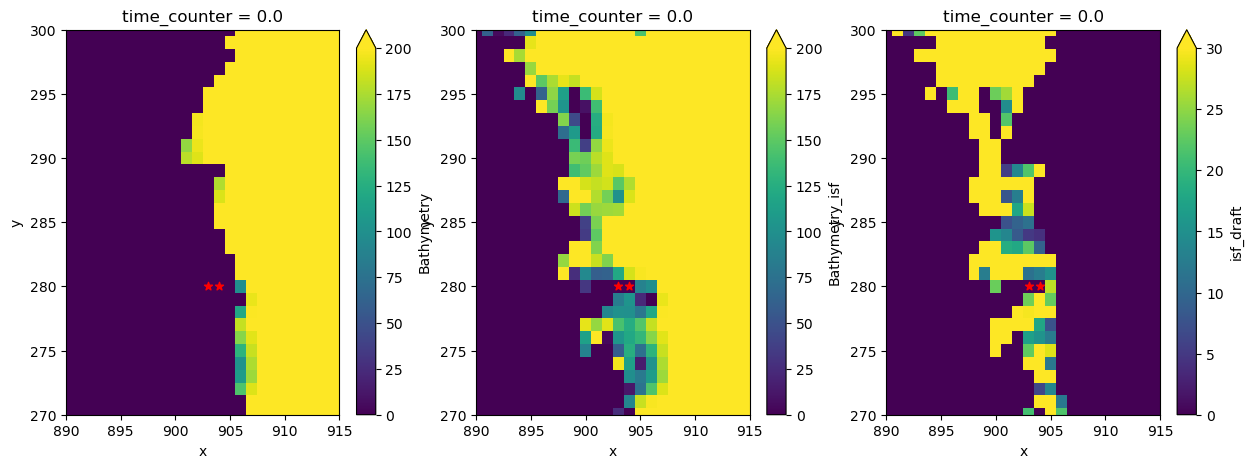

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [43]:
bathy_new.to_netcdf(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260108.nc')

### Have a look at the new domain_cfg file generated by the NEMO DOMAINcfg tool:

In [44]:
domain_new = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc')

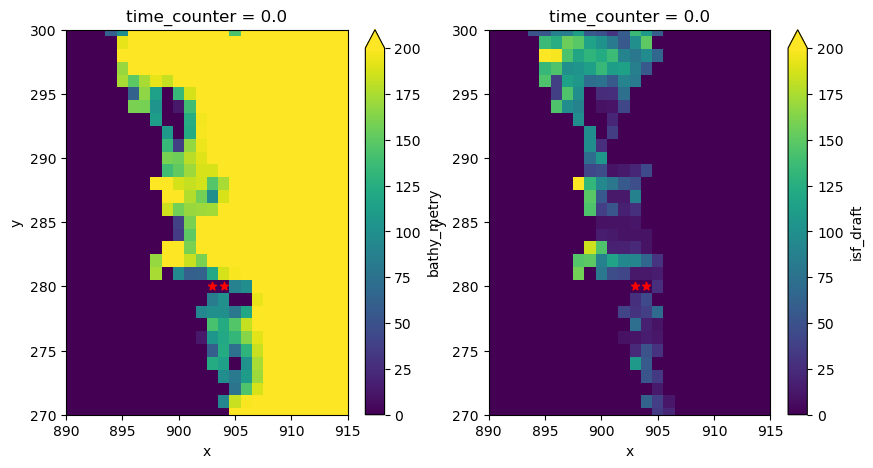

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_new.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_new.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

## Plus fill any other holes 
i.e. the one identified by Alethea

Nico: (382, 158), (383, 158)

In [55]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
domain_current = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc')
bathy_current  = xr.open_dataset(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260108.nc')
ds_current     = xr.open_dataset(f'{base_dir}output/CESM2_3hwind_1920_t0_0955/files0/eANT025.L121_1m_19500101_19501231_icemod_compressed.nc')

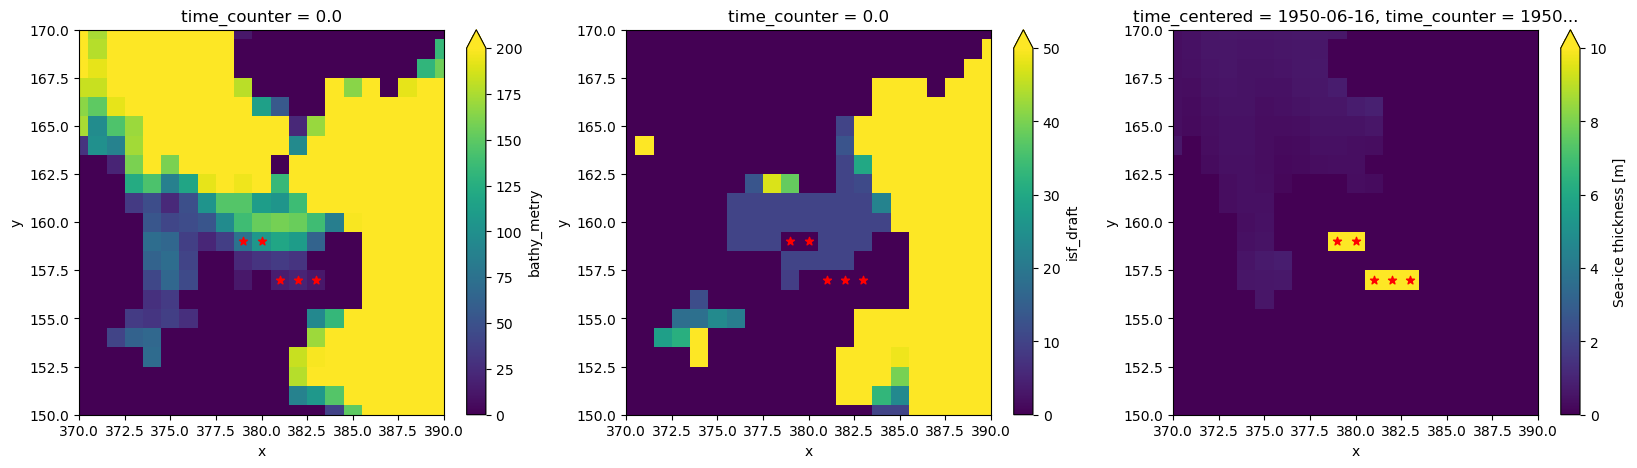

In [3]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=50, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

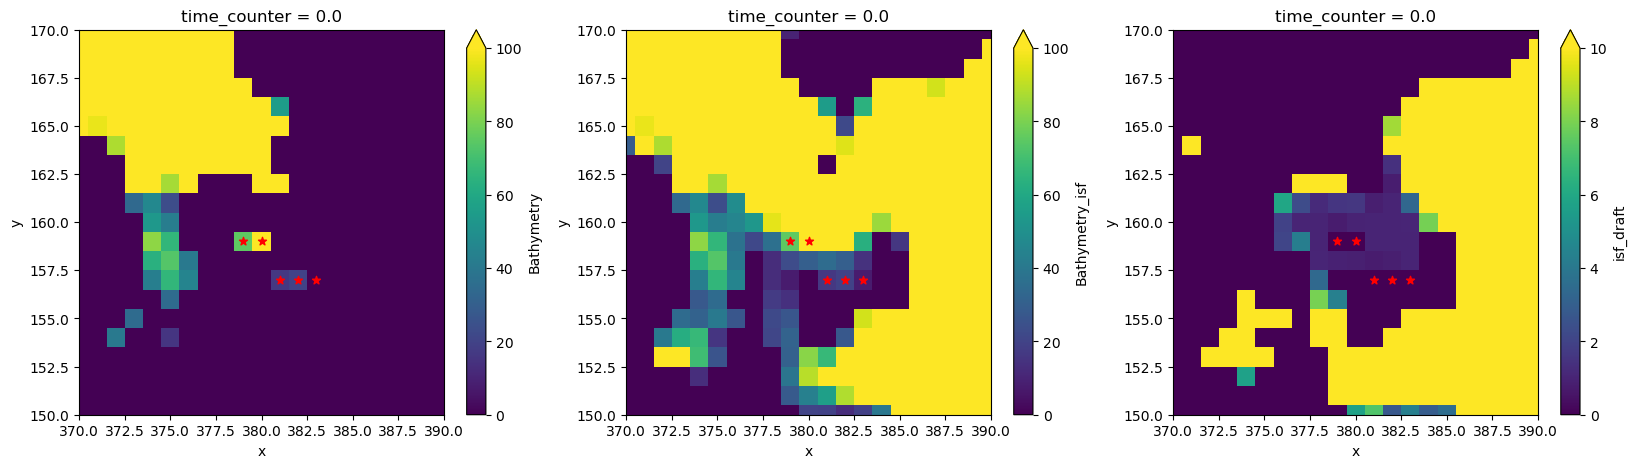

In [26]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=100, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

In [91]:
bathy_new = bathy_current.copy()
xval=slice(379,381)
yval=159

# open upper row as cavity
make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[yval, xval] = 1
bathy_new['Bathymetry']  = xr.where(make_shelf==1, 0, bathy_current['Bathymetry'])
bathy_new['isf_draft'].values[yval,xval] = bathy_current['isf_draft'].values[yval-1,xval] # fill with values just south

# and fill lower row as land
xval=slice(381,384)
yval=157
make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[yval, xval] = 1
bathy_new['Bathymetry']     = xr.where(make_shelf==1, 0, bathy_new['Bathymetry'])
bathy_new['Bathymetry_isf'] = xr.where(make_shelf==1, 0, bathy_new['Bathymetry_isf'])
bathy_new.to_netcdf(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260121.nc')

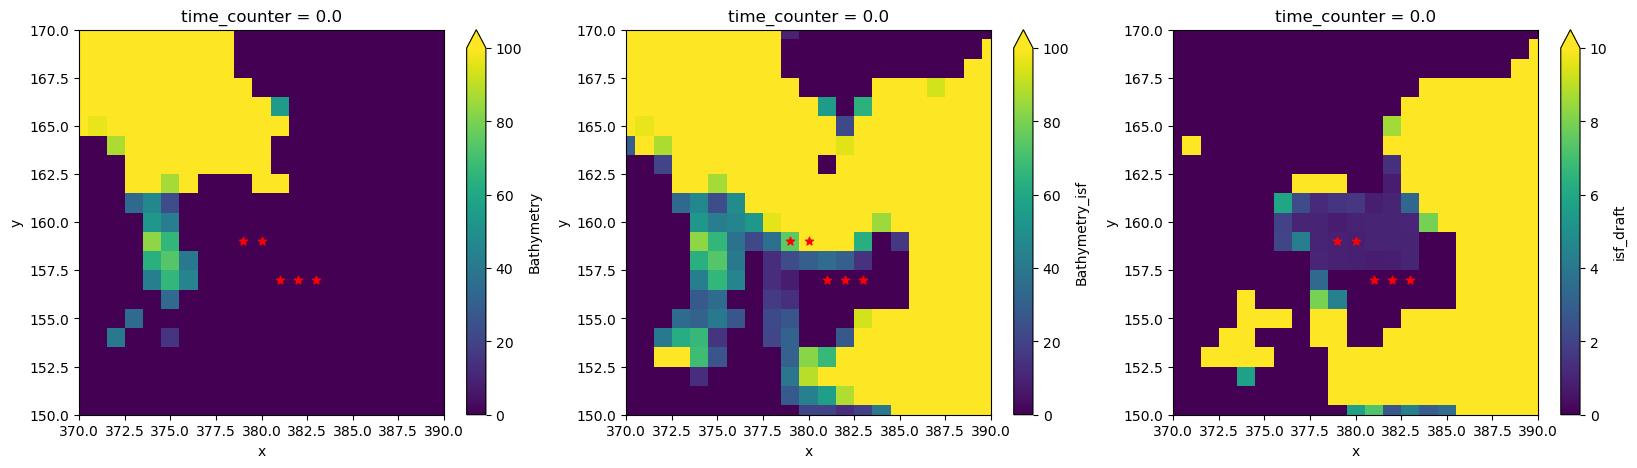

In [49]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(370,390)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=100, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([381, 382, 383], [157, 157, 157], marker='*', color='r')
    axis.scatter([379, 380], [159, 159], marker='*', color='r')

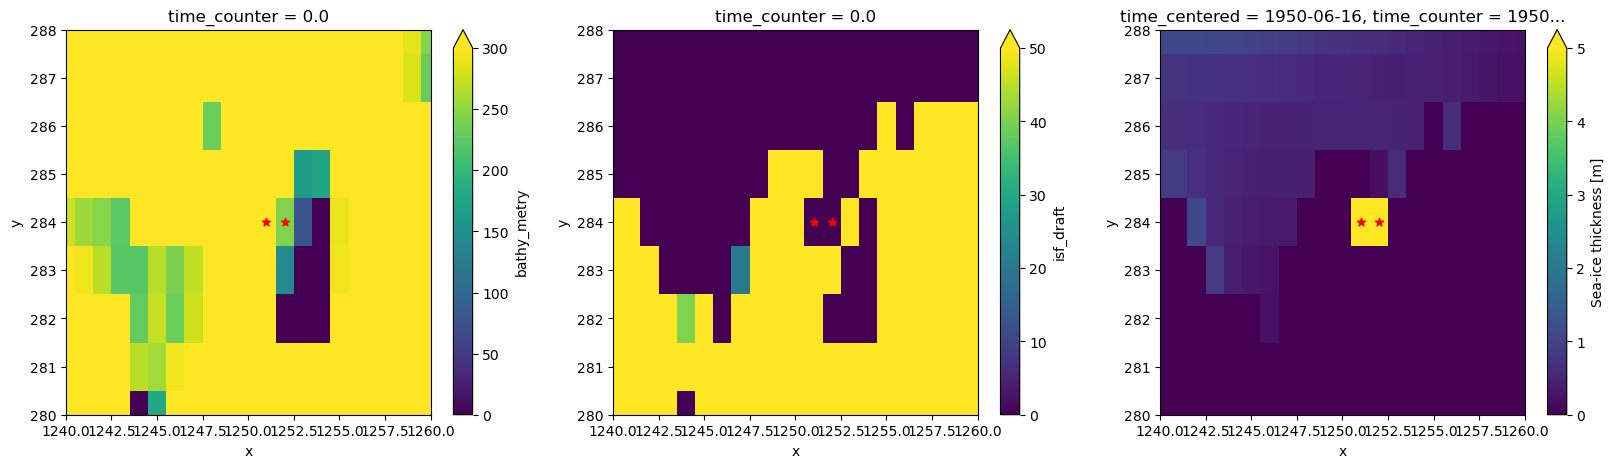

In [54]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(280,288), 'xlim':(1240,1260)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=300, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=50, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=5, **kwags)

for axis in ax.ravel():
    axis.scatter([1251, 1252], [284, 284], marker='*', color='r')

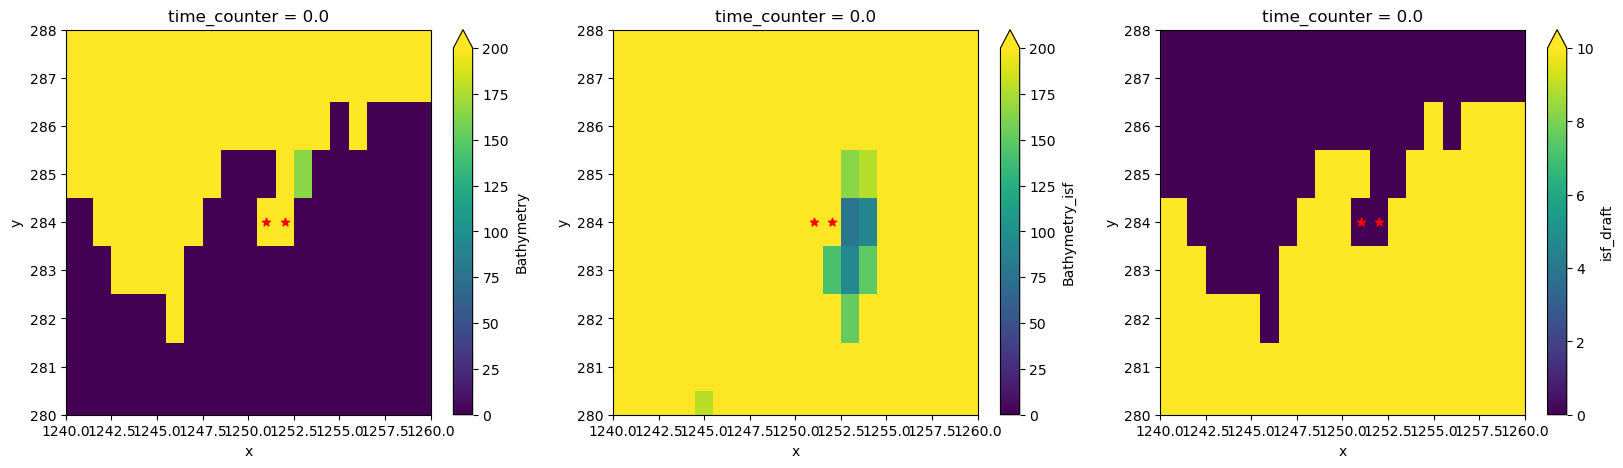

In [51]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(280,288), 'xlim':(1240,1260)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([1251, 1252], [284, 284], marker='*', color='r')

In [92]:
from scipy.signal import convolve2d

def find_isolated_cells(grid, neighbor_threshold=2):
    """
    Identifies non-zero cells that have fewer than a specific 
    number of non-zero neighbors.
    
    Parameters:
    -----------
    grid : xarray.DataArray or numpy.ndarray
        2D array of values (e.g., Bathymetry).
    neighbor_threshold : int
        The maximum number of non-zero neighbors allowed for a 
        cell to be flagged. (Default 2 means 0, 1, or 2 neighbors).
        
    Returns:
    --------
    mask : same type as input
        Boolean mask where True indicates an isolated non-zero cell.
    """
    # 1. Convert to a binary mask (1 for water, 0 for land)
    data = grid.values if isinstance(grid, xr.DataArray) else grid
    binary = (data != 0).astype(int)
    
    # 2. Define a kernel to count neighbors (excluding the center cell)
    # This kernel looks at the 8 surrounding cells.
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
    
    # 3. Convolve to count non-zero neighbors for every cell
    # 'same' keeps the output dimensions identical to the input
    neighbor_count = convolve2d(binary, kernel, mode='same', boundary='fill', fillvalue=0)
    
    # 4. Logic: Cell must be non-zero AND neighbors must be <= threshold
    is_isolated = (binary == 1) & (neighbor_count <= neighbor_threshold)
    
    # Return as xarray if input was xarray
    if isinstance(grid, xr.DataArray):
        return xr.DataArray(is_isolated, coords=grid.coords, dims=grid.dims)
    return is_isolated

# --- Example Usage ---
# Create a grid where '1' is water and '0' is land
data = np.array([
    [1, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],  # This '1' is totally isolated (0 neighbors)
    [0, 0, 0, 0, 0, 0],  # This '1' is a peninsula (1 neighbor)
    [0, 0, 0, 1, 1, 0],  # This '1' has two neighbors
    [0, 0, 0, 0, 0, 0],  # This middle '1' has two neighbors
])

mask = find_isolated_cells(data, neighbor_threshold=1)
print("Isolated Cells Mask:\n", mask.astype(int))

Isolated Cells Mask:
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


In [145]:
mask_ocn = find_isolated_cells(bathy_new.Bathymetry.drop_vars('time_counter'), neighbor_threshold=1)
mask_isf = xr.where(mask_ocn*(bathy_new.isf_draft==0), 1, 0)
indices  = np.argwhere(mask_isf.values != 0)

# 2. Map those indices back to the actual coordinate values
coords_list = [{dim: mask_isf.coords[dim][idx].values.item() for dim, idx in zip(da.dims, row)} for row in indices]

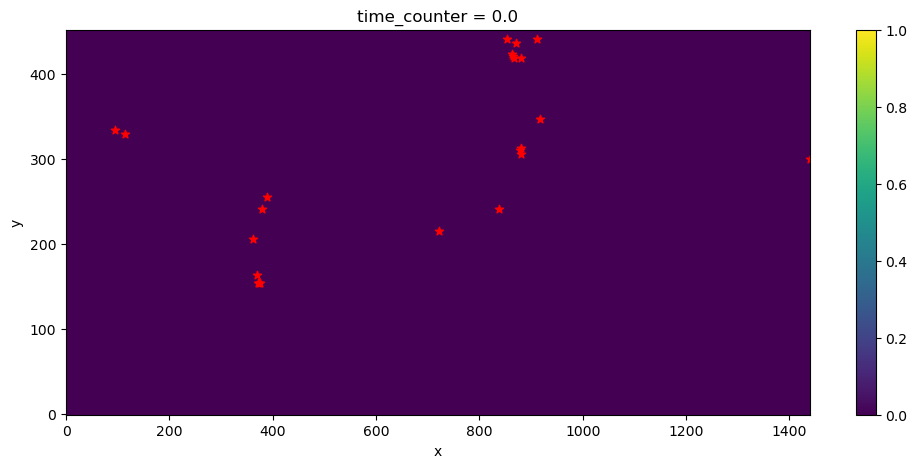

In [143]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
mask.plot(ax=ax)
for coord in coords_list:
    ax.scatter(coord['x'], coord['y'], marker='*', color='r')

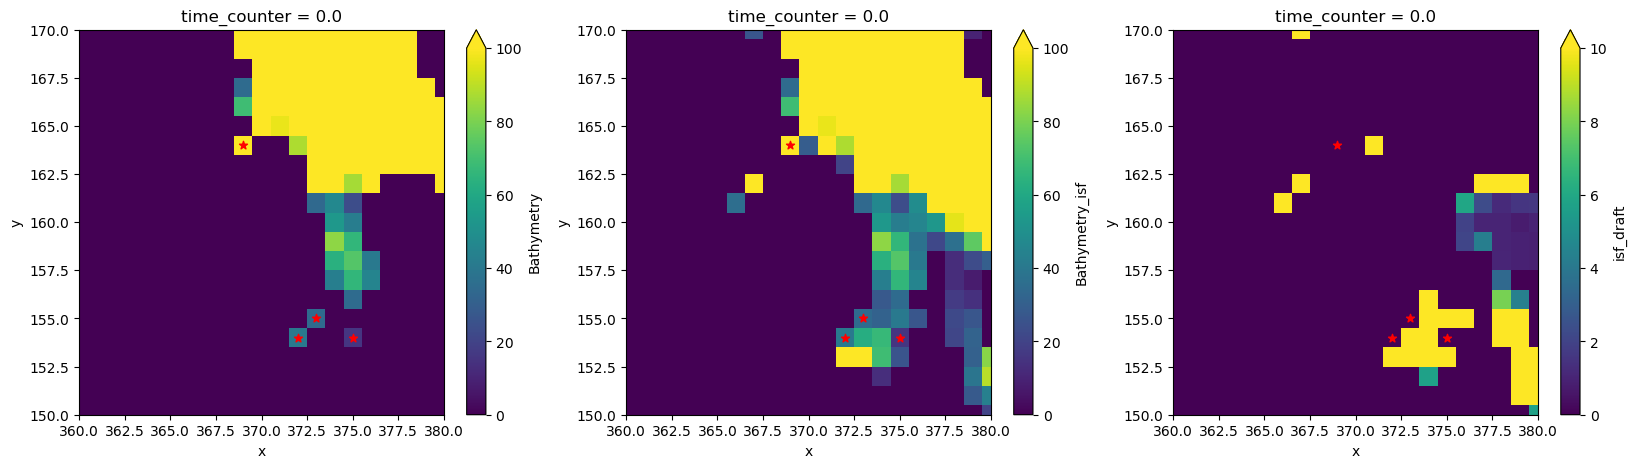

In [146]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(360,380)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=100, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=100, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    for coord in coords_list:
        axis.scatter(coord['x'], coord['y'], marker='*', color='r')

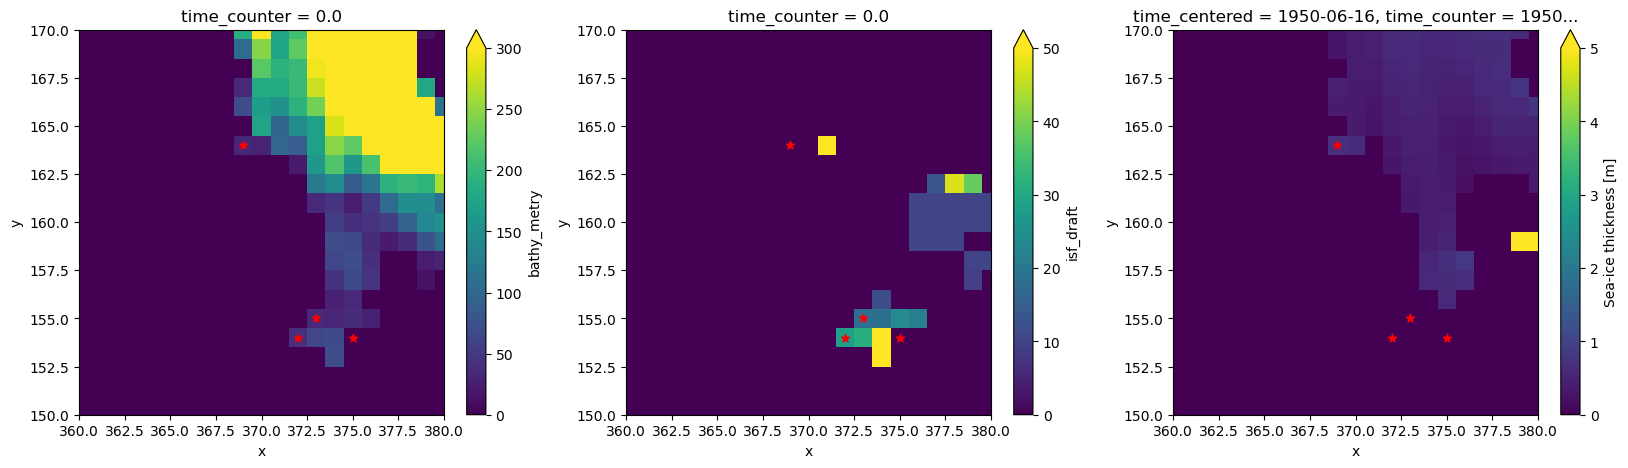

In [147]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
kwags = {'ylim':(150,170), 'xlim':(360,380)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=300, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=50, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=5, **kwags)

for axis in ax.ravel():
    for coord in coords_list:
        axis.scatter(coord['x'], coord['y'], marker='*', color='r')